In [53]:

# Import libraries

import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [50]:
meterData = pd.read_csv('/Users/evansherwin/PycharmProjects/SatelliteTesting/PHX meter data/rawdata20221011.csv')
recordedCMData = pd.read_csv('/Users/evansherwin/PycharmProjects/SatelliteTesting/PHX meter data/CM release levels 20221011 - Sheet1.csv')
wifitestData = pd.read_csv('/Users/evansherwin/PycharmProjects/SatelliteTesting/PHX meter data/20221011_1605_wifitest.csv')


In [54]:
meterData = wifitestData

colnames = ['TIMESTAMP', 'FIC101SP', 'FIC101PV', 'FlowPath1', 'FIC102SP', 'FIC102PV', 'FlowPath2', 'FIC103SP', 'FIC103PV', 'FlowPath3', 'FIC104PV']

meterData.columns = colnames
numericcols =['FIC101SP', 'FIC101PV', 'FlowPath1', 'FIC102SP', 'FIC102PV', 'FlowPath2', 'FIC103SP', 'FIC103PV', 'FlowPath3', 'FIC104PV']
meterData[numericcols] = meterData[numericcols].apply(pd.to_numeric, errors='coerce', axis=1)

,TIMESTAMP,FIC101SP,FIC101PV,FlowPath1,FIC102SP,FIC102PV,FlowPath2,FIC103SP,FIC103PV,FlowPath3,FIC104PV
0,Sat Oct 08 2022 20:36:41 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
1,Sat Oct 08 2022 20:36:42 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
2,Sat Oct 08 2022 20:36:43 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0
3,Sat Oct 08 2022 20:36:44 GMT+0100 (British Sum...,NaN,21.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
4,Sat Oct 08 2022 20:36:45 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0


In [55]:
meterData.head()

,TIMESTAMP,FIC101SP,FIC101PV,FlowPath1,FIC102SP,FIC102PV,FlowPath2,FIC103SP,FIC103PV,FlowPath3,FIC104PV
0,Sat Oct 08 2022 20:36:41 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
1,Sat Oct 08 2022 20:36:42 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
2,Sat Oct 08 2022 20:36:43 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0
3,Sat Oct 08 2022 20:36:44 GMT+0100 (British Sum...,NaN,21.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
4,Sat Oct 08 2022 20:36:45 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0


In [48]:
meterData.describe()

,FIC101SP,FIC101PV,FlowPath1,FIC102SP,FIC102PV,FlowPath2,FIC103SP,FIC103PV,FlowPath3,FIC104PV
count,4141.000000,46344.000000,4137.000000,39939.000000,46344.000000,40285.000000,1562.000000,46344.000000,0.0,46321.000000
mean,794.892297,74.280058,0.920715,79.466261,67.703694,0.883431,9.091549,0.003970,NaN,56.996848
std,580.007621,283.574488,0.326162,76.448071,73.707752,0.346572,11.948960,0.178178,NaN,60.272241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,200.000000,0.000000,1.000000,17.000000,6.000000,1.000000,0.000000,0.000000,NaN,3.000000
50%,800.000000,0.000000,1.000000,50.000000,36.000000,1.000000,0.000000,0.000000,NaN,30.000000
75%,1400.000000,16.000000,1.000000,132.000000,109.000000,1.000000,25.000000,0.000000,NaN,94.000000
max,1600.000000,1776.000000,3.000000,400.000000,289.000000,6.000000,27.000000,8.000000,NaN,249.000000


In [56]:
# Running standard deviation of flow rate by time interval

meterData['rollingMean30s'] = meterData['FIC102PV'].rolling(30).mean()
meterData['rollingStd30s'] = meterData['FIC102PV'].rolling(30).std()
meterData['rollingStdPct30s'] = 100*meterData['rollingStd30s']/meterData['rollingMean30s']

meterData.head()

,TIMESTAMP,FIC101SP,FIC101PV,FlowPath1,FIC102SP,FIC102PV,FlowPath2,FIC103SP,FIC103PV,FlowPath3,FIC104PV,rollingMean30s,rollingStd30s,rollingStdPct30s
0,Sat Oct 08 2022 20:36:41 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,Sat Oct 08 2022 20:36:42 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,Sat Oct 08 2022 20:36:43 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN
3,Sat Oct 08 2022 20:36:44 GMT+0100 (British Sum...,NaN,21.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,Sat Oct 08 2022 20:36:45 GMT+0100 (British Sum...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN


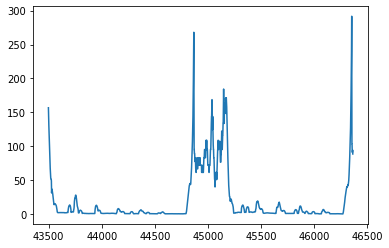

In [65]:
ax = plt.gca()
# meterData['rollingMean30s'].plot(ax=ax)
# meterData['rollingStd30s'].plot(ax=ax)
# plt.plot(meterData.loc[43471:46368, 'TIMESTAMP'], meterData.loc[43471:46368, 'rollingStdPct30s'])
meterData.loc[43471:46368, 'rollingStdPct30s'].plot(ax=ax)
plt.ylim(0,50)
# plt.savefig('Coriolis flow variability 20221011.pdf', format='pdf')
plt.savefig('Wifi flow variability 50%lim 20221011.pdf', format='pdf')
# plt.show()

In [35]:
meterData['rollingStdPct30s'].tail()

25358    0.830455
25359    0.830455
25360    0.830455
25361    0.773893
25362    0.773893
Name: rollingStdPct30s, dtype: float64

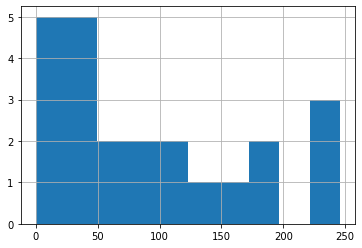

In [44]:
# Carbon Mapper release histogram 10/10/2022
recordedCMData['Flow (kgh)'].hist()
plt.savefig('CM flow rate histogram 20221010.pdf', format='pdf')